In [95]:
import sympy
from sympy import  Symbol, symbols, S, Point, Line, Plane, Point3D,\
Matrix, Eq, latex, sqrt, simplify, solve, linsolve
from IPython.display import display, Latex

# Практическое занятие 6
# Компьютерный практикум по алгебре на Python
##  Прямые и плоскости в пространстве. Geometry.
### Задание 1.
Задать точки $A(-1, 2, -4)$,
$B(2, -2, 1)$,
$C(5, 3, -6)$,
$D(0, 3, -6)$ как Point из Geometry и
найти с помощью  **angle_between** угол между плоскостями $ABC$ и  $ABD$.


In [ ]:
A = Point(-1, 2, -4)
B = Point(2, -2, 1)
C = Point(5, 3, -6)
D = Point(0, 3, -6)

ABC = Plane(A, B, C)
ABD = Plane(A, B, D)

display(Latex(fr"""\text{{Угол между плоскостями ABC и ABD равен }} {latex(ABC.angle_between(ABD))}"""))

<IPython.core.display.Latex object>

### Задание 2.
Найти угол между прямой, проходящей через точки $A(-3,5,1)$ и $B(5,2,-3)$ и плоскостью, в которой лежат точки
$K(4,3,0)$, $M(2,4,-2)$ и $N(-2,2,-1)$.

In [ ]:
A = Point(-3, 5, 1)
B = Point(5, 2, -3)

K = Point(4, 3, 0)
M = Point(2, 4, -2)
N = Point(-2, 2, -1)

AB = Line(A, B)
KMN = Plane(K, M, N)

display(Latex(fr"""\text{{Угол между AB и KMN равен }} {latex(KMN.angle_between(AB))}"""))

<IPython.core.display.Latex object>

### Задание 3.
Проверить, лежат ли точки в одной плоскости

а) $A(3, 2, -1)$, $B(2, -1, 0)$, $C(5, 2, -6)$, $D(6, 5, -7)$

b) $A(-1, 5, -4)$, $B(7, -2, 1)$, $C(6, 3, -8)$, $D(0, 3, 0)$

Вывести на экран сообщение "Точки лежат в одной плоскости" или "Точки не лежат в одной плоскости".

In [ ]:
def result(A, B, C, D):
  res = ''
  if not(Point3D.are_coplanar(A, B, C, D)):
    res = 'не '
  print(f"Точки A, B, C, D {res}лежат в одной плоскости.")

A = Point(3, 2, -1)
B = Point(2, -1, 0)
C = Point(5, 2, -6)
D = Point(6, 5, -7)
result(A, B, C, D)

A = Point(-1, 5, -4)
B = Point(7, -2, 1)
C = Point(6, 3, -8)
D = Point(0, 3, 0)
result(A, B, C, D)


Точки A, B, C, D лежат в одной плоскости.
Точки A, B, C, D не лежат в одной плоскости.


###  Задание 4.
Для плоскостей Задания 1 найти векторы нормали (воспользоваться свойством normal_vector), преобразовать их в матрицы-столбцы и вычислить угол между плоскостями с помощью скалярного произведения. Сравнить с результатом Задания 1.

In [4]:
A = Point(-1, 2, -4)
B = Point(2, -2, 1)
C = Point(5, 3, -6)
D = Point(0, 3, -6)

ABC = Plane(A, B, C)
ABD = Plane(A, B, D)

ABC_Matrix = Matrix(ABC.normal_vector)
ABD_Matrix = Matrix(ABD.normal_vector)

res = ABC_Matrix.dot(ABD_Matrix) / (sqrt(ABC_Matrix.dot(ABC_Matrix)) * sqrt(ABD_Matrix.dot(ABD_Matrix)))


display(res)

99*sqrt(40454)/20227

###  Задание 5.
Прямая задана параметрическими уравнениями:
$$
\left\{\begin{matrix}
x=2+5t\\
y=-1-2t\\
z=4-3t
\end{matrix}\right..
$$
Представить прямую в виде линии пересечения двух плоскостей (вывести на экран уравнения плоскостей),
одна из которых проходит через начало координат, а вторая плоскость перпендикулярна первой плоскости.

**Указание:** сначала найти две различные точки на прямой и далее решить средствами для работы с прямыми и плоскостями из модуля Geometry.

In [64]:
t = Symbol('t')
base = Matrix([2+5*t, -1-2*t, 4-3*t])

A = Point(0, 0, 0)
B = Point(base.subs(t, 0))
C = Point(base.subs(t, 1))

first = Plane(A, B, C)
display(Latex(fr'\text{{Уравнение первой плоскости: }}{latex(Eq(first.equation(), 0))}'))

v_norm = first.perpendicular_line(B)
second = Plane(C, v_norm.p1, v_norm.p2)
display(Latex(fr'\text{{Уравнение второй плоскости: }}{latex(simplify(Eq(second.equation(), 0)))}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

###  Задание 6*.
Даны точки  пространстве
$A(-2, 7, -5)$, $B(6, 2, -4)$, $C(14, -3, -2)$, $D(22, -8, -2)$, $K(30, -7, -4)$,
$M(94, -35, -2)$.

Определить, какие тройки точек лежат на одной прямой, какие четверки - в одной плоскости.

Для проверки того, что три точки лежат на одной прямой использовать Point3D.are_collinear.

Вывести на экран тройки точек, лежащие на одной прямой и четверки точек, лежащих в одной плоскости.

In [65]:
A = Point(-2, 7, -5)
B = Point(6, 2, -4)
C = Point(14, -3, -2)
D = Point(22, -8, -2)
K = Point(30, -7, -4)
M = Point(94, -35, -2)

points = [A, B, C, D, K, M]
point_names = ['A', 'B', 'C', 'D', 'K', 'M']
one_line = []
one_plane = []
n = len(points)
for i in range(n):
  for j in range(i + 1, n):
    for k in range(j + 1, n):
      if (Point3D.are_collinear(points[i], points[j], points[k])):
        one_line += [f'{point_names[i]}, {point_names[j]}, {point_names[k]}']
        for l in range(k+1, n):
          if (Point3D.are_collinear(points[i], points[j], points[k])):
            one_plane += [f'{point_names[i]}, {point_names[j]}, {point_names[k]}, {point_names[l]}']

for i in one_line:
  print(i + ' - лежат на одной прямой')
for i in one_line:
  print(i + ' - лежат в одной плоскости')

A, B, D - лежат на одной прямой
A, K, M - лежат на одной прямой
A, B, D - лежат в одной плоскости
A, K, M - лежат в одной плоскости


###  Задание 7*.
Составить уравнения всех (различных!) плоскостей, определяемых точками задания 1.

Указание: решать аналогично Примеру 11, проверить, что $A$, $B$, $C$ не лежат на одной прямой и составить плоскость $ABC$, включить ее в список плоскостей.

In [76]:
A = Point(-1, 2, -4)
B = Point(2, -2, 1)
C = Point(5, 3, -6)
D = Point(0, 3, -6)

points = [A, B, C, D]
point_names = ['A', 'B', 'C', 'D']
planes = []

n = len(points)
for i in range(n):
  for j in range(i + 1, n):
    for k in range(j + 1, n):
      if Point3D.are_coplanar(points[i], points[j], points[k]):
        display(Latex(fr'{point_names[i]}{point_names[j]}{point_names[k]}: {latex(Eq(Plane(points[i], points[j], points[k]).equation(), 0))}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Индивидуальное задание
Даны точки в пространстве
$A$, $B$, $C$ и
$M$.

Найти угол между прямой $AB$ и плоскостью $CDM$, угол между $AC$ и $CM$, угол между плоскостями $ABC$ и $CDM$.

Составить уравнение:

a) плоскости, параллельной $ABC$ и проходящей через $M$,

b) плоскости, перпендикулярной $ABC$ и проходящей через $A$ и $M$,

c) прямой (параметрическое!), перпендикулярной $ABC$ и проходящей через $C$.

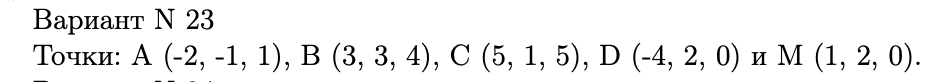

In [101]:
A = Point(-2, -1, 1)
B = Point(3, 3, 4)
C = Point(5, 1, 5)
D = Point(-4, 2, 0)
M = Point(1, 2, 0)

AB = Line(A, B)
AC = Line(A, C)
CM = Line(C, M)
ABC = Plane(A, B, C)
CDM = Plane(C, D, M)

display(Latex(fr'∠(AB, CDM) = {latex(CDM.angle_between(AB))}'))
display(Latex(fr'∠(AC, CM) = {latex(CM.angle_between(AC))}'))
display(Latex(fr'∠(ABC, CDM) = {latex(CDM.angle_between(ABC))}'))

print('\nα || ABC & M ∊	α:')
display(Eq(ABC.parallel_plane(M).equation(), 0))

print('\nα ⊥ ABC & M ∊ α & A ∊ α:')
display(Eq(ABC.perpendicular_plane(A, M).equation(), 0))

print('\nα ⊥ ABC & C ∊ α:')
display(solve(Matrix(ABC.perpendicular_line(C).equation())))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


α || ABC & M ∊	α:


Eq(10*x + y - 18*z - 12, 0)


α ⊥ ABC & M ∊ α & A ∊ α:


Eq(-53*x + 44*y - 27*z - 35, 0)


α ⊥ ABC & C ∊ α:


{x: 70/9 - 5*z/9, y: 23/18 - z/18}